In [6]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harpreetbabbar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


100%|██████████| 2.70G/2.70G [00:26<00:00, 109MB/s]


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

## Training image preprocessing

In [14]:
training_set= tf.keras.utils.image_dataset_from_directory(
    "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set= tf.keras.utils.image_dataset_from_directory(
'/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


# Building Model

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense,MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(256,256,3),padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64, kernel_size=3, activation="relu",padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=3, activation="relu",padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=256, kernel_size=3, activation="relu",padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512, kernel_size=3, activation="relu",padding='same'))
model.add(Conv2D(filters=512, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25)) # To avoid overfitting

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500, activation="relu"))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
# Output Layer
model.add(Dense(units=38, activation="softmax"))

## Compiling Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │    27,649,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,418,762 (123.67 MB)

 Trainable params: 32,418,762 (123.67 MB)

 Non-trainable params: 0 (0.00 B)

# Model training

In [ ]:
training_accuracy = model.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 524s 228ms/step - accuracy: 0.5166 - loss: 1.7234 - val_accuracy: 0.8876 - val_loss: 0.3694
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 475s 216ms/step - accuracy: 0.8855 - loss: 0.3618 - val_accuracy: 0.9452 - val_loss: 0.1647
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 475s 216ms/step - accuracy: 0.9384 - loss: 0.1928 - val_accuracy: 0.9422 - val_loss: 0.1814
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 510s 220ms/step - accuracy: 0.9590 - loss: 0.1250 - val_accuracy: 0.9561 - val_loss: 0.1418
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 473s 215ms/step - accuracy: 0.9676 - loss: 0.0964 - val_accuracy: 0.9637 - val_loss: 0.1146


## To avoid Overshooting:
* Choose small learning rate default 0.001, we should take 0.0001
* There may be a chance of underfitting, hence increase number of neurons
* Add more convolution layer to extract more feature from images


# Model Evaluation on training set

In [ ]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9893 - loss: 0.0330


In [ ]:
print(train_loss,train_acc)

0.02969520352780819 0.9906678795814514


In [ ]:
# On validation set
val_loss,val_acc=model.evaluate(validation_set)
print(val_loss,val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - accuracy: 0.9643 - loss: 0.1123
0.11464951932430267 0.9637491703033447


# Saving Model

In [ ]:
model.save("plant_disease_model.keras")

In [ ]:
training_accuracy.history

{'accuracy': [0.6979159116744995,
  0.902823805809021,
  0.9442350268363953,
  0.9615193009376526,
  0.9700263142585754],
 'loss': [1.0243918895721436,
  0.3077773153781891,
  0.17515750229358673,
  0.11690772324800491,
  0.0892801508307457],
 'val_accuracy': [0.8876053094863892,
  0.9451969265937805,
  0.9422376751899719,
  0.9560664892196655,
  0.9637491703033447],
 'val_loss': [0.3693845272064209,
  0.1647351235151291,
  0.18139983713626862,
  0.14178238809108734,
  0.1146494522690773]}

## Saving history as json

In [ ]:
import json
with open('training_history.json', 'w') as f:
    json.dump(training_accuracy.history, f)

## Accuracy visualization

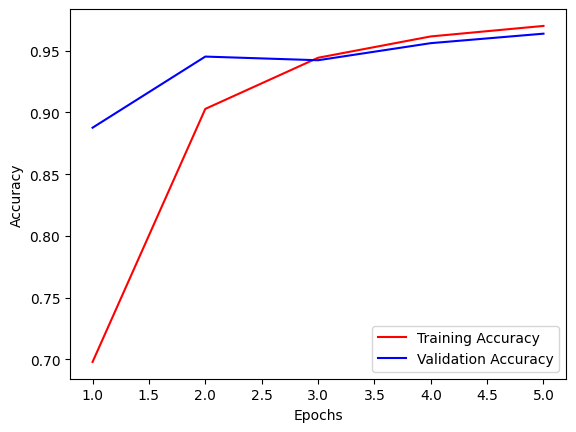

In [ ]:
epochs =[i for i in range(1,6)]
plt.plot(epochs,training_accuracy.history["accuracy"],label="Training Accuracy",color='red')
plt.plot(epochs,training_accuracy.history["val_accuracy"],label="Validation Accuracy",color='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Metric for model evaluation

In [ ]:
class_name= training_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
'/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred= model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step


In [ ]:
predicted_categories= tf.math.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.math.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

## Calculating precision and recall

In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report

p_score = precision_score(Y_true, predicted_categories, average='macro')
r_score = recall_score(Y_true, predicted_categories, average='macro')
class_report= classification_report(Y_true, predicted_categories, target_names=class_name)

print(f'Precision Score: {p_score}')
print(f'Recall Score: {r_score}')
print(class_report)

Precision Score: 0.9648198093126873
Recall Score: 0.9636485520573433
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.89      0.97      0.93       502
                               Blueberry___healthy       0.99      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.98       477
          

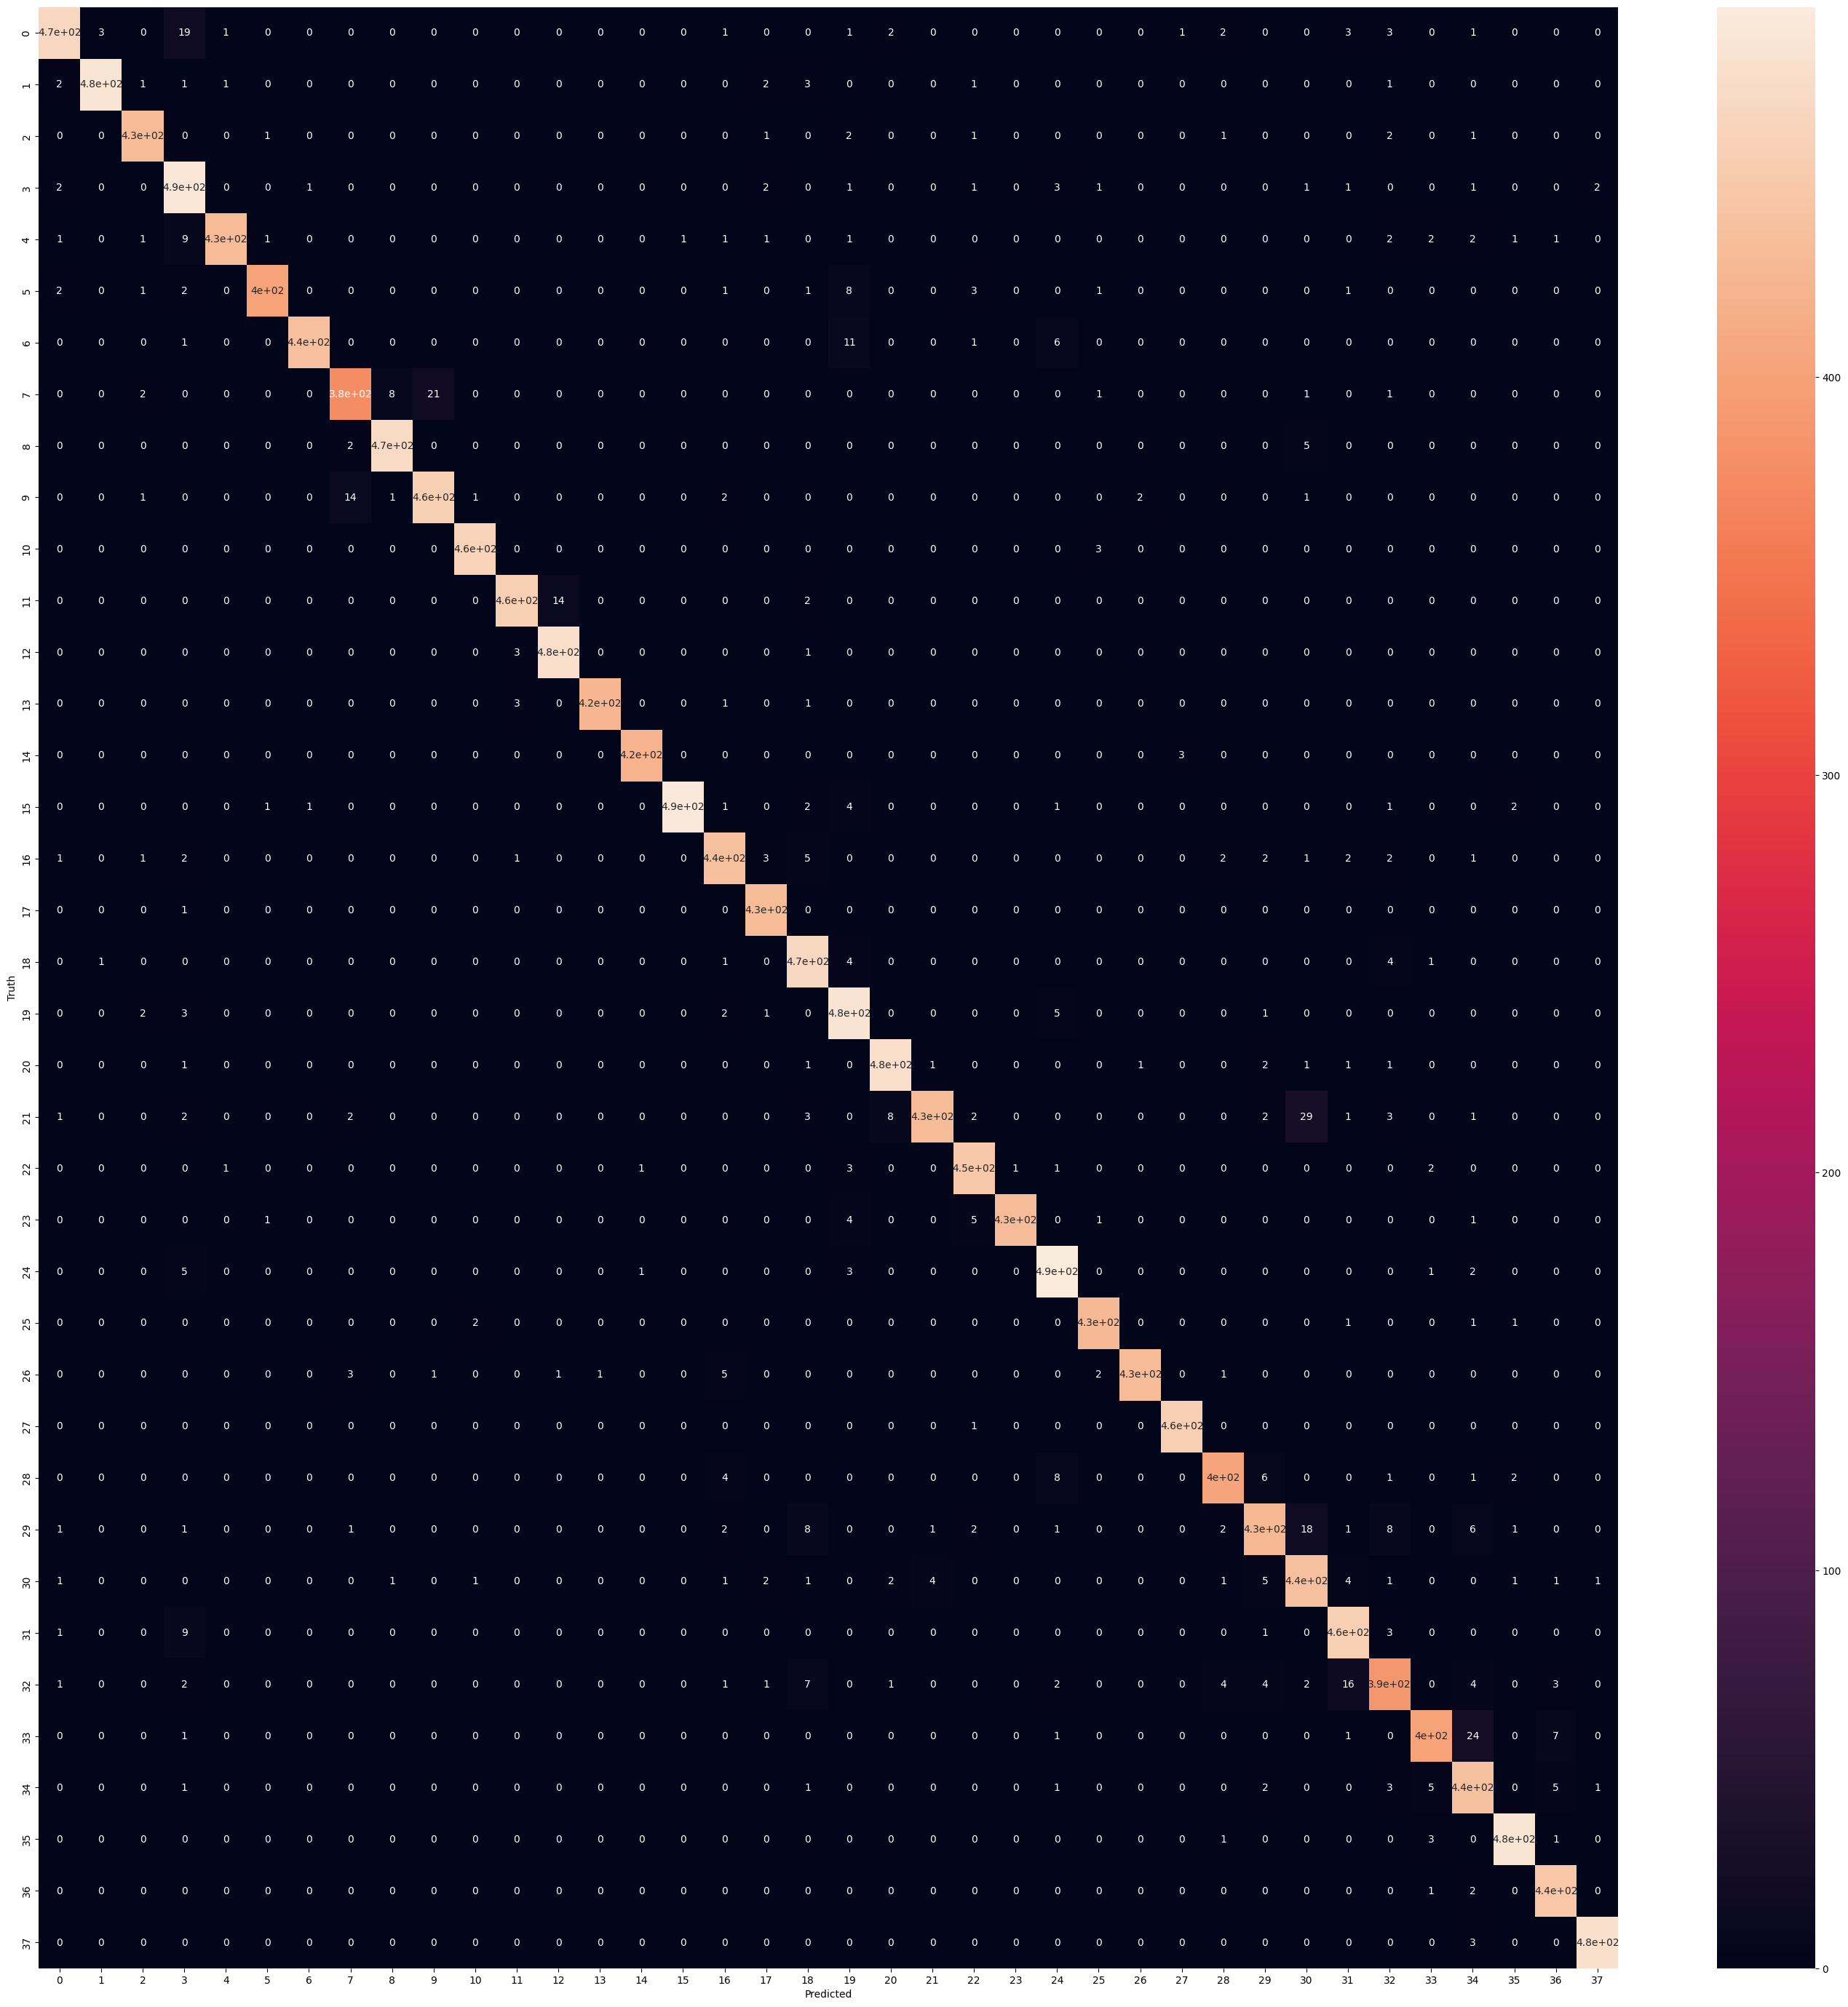

In [ ]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(Y_true, predicted_categories)
plt.figure(figsize=(35,35))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Testing the model on test set

In [3]:
model_final = tf.keras.models.load_model("/content/plant_disease_model.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
model_final.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │    27,649,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,837,526 (247.34 MB)

 Trainable params: 32,418,762 (123.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,418,764 (123.67 MB)

# Visualizing single image of test set

In [5]:
import cv2


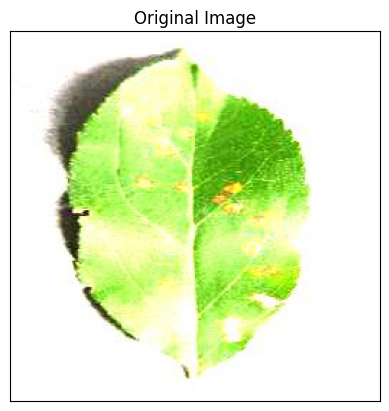

In [7]:
image_path = '/content/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'

# Reading Image
img= cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display image
plt.imshow(img)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
import numpy as np

image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 256, 256, 3)


In [11]:
predictions = model_final.predict(input_arr)
print(predictions)
print(predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[3.4606810e-11 9.7123629e-12 9.9999678e-01 1.5705378e-12 7.5966389e-09
  2.8983817e-07 7.9704843e-15 1.4291730e-12 4.6230059e-14 4.4770973e-14
  2.4206040e-14 6.3819694e-10 7.1487448e-11 9.5722930e-13 2.4822329e-13
  1.3794353e-07 8.8756769e-10 9.4423839e-13 4.2076095e-10 3.1800862e-08
  3.8414416e-13 3.8720485e-14 2.8164948e-10 8.5166518e-12 1.6829527e-16
  8.7632565e-14 2.7675781e-13 3.7110657e-13 1.1760908e-07 3.5667434e-11
  2.6732587e-07 3.7094719e-10 1.7364975e-09 5.8126252e-13 2.5264359e-08
  2.3635803e-06 3.0224854e-08 2.2014213e-11]]
(1, 38)


In [12]:
result = tf.math.argmax(predictions,axis=1)
print(result)

tf.Tensor([2], shape=(1,), dtype=int64)


In [15]:
class_name = training_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

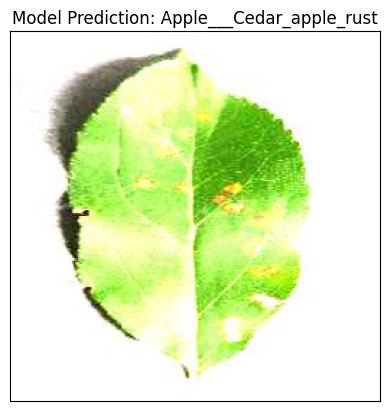

In [18]:
model_prediction = class_name[result.numpy()[0]]
plt.title(f"Model Prediction: {model_prediction}")
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()